In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
import control
import matplotlib

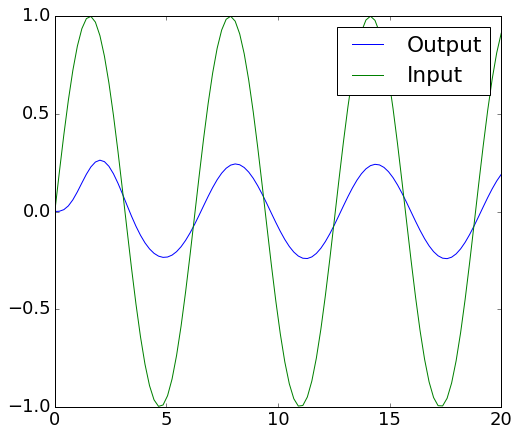

In [3]:
#Response of a linear SISO system to a sinusoidal input
matplotlib.rcParams['figure.figsize'] = (8.0,7.0)
matplotlib.rcParams.update({'font.size': 18})
G = control.tf([1],[1,1,5])
T = np.linspace(0,20,100)
u = np.sin(T)
T, y_sin, foo  = control.forced_response(G,T,u)
plt.plot(T,y_sin)
plt.plot(T,u)
plt.legend(['Output','Input'])

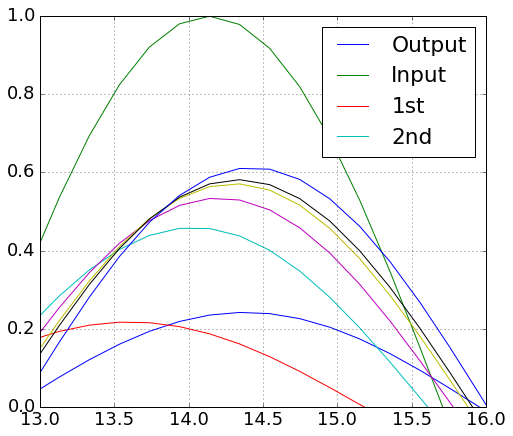

In [5]:
#Compensador 
Kc=5
Tc=2
plt.plot(T,y_sin)
plt.plot(T,u)
for alpha in [0.1,0.4,0.8,1.5,2,100]:
    Gc=Kc*alpha*control.tf([Tc,1],[alpha*Tc,1])
#     print(Gc)
#     print(Gc.pole())
#     print(Gc.zero())
    G_cl = control.feedback(control.series(Gc,G),1)
    T, y_sin_adel, foo  = control.forced_response(G_cl,T,u)
    plt.plot(T,y_sin_adel)
    plt.legend(['Output', 'Input','1st','2nd'])
plt.xlim([13,16])
plt.ylim([0,1])
plt.grid(True)

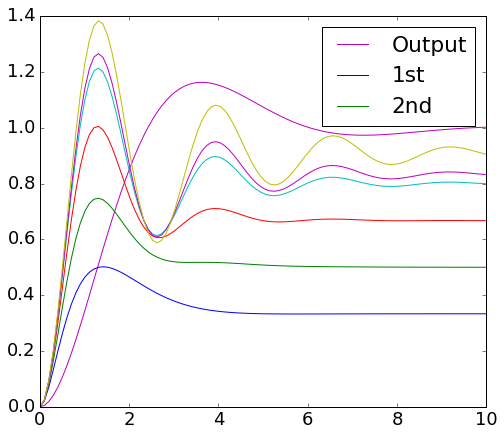

In [10]:
#Response of a linear SISO system to a slope with a compensator
Kc=10
Tc=10
G = control.tf([1],[1,1,1])
T = np.linspace(0,10,100)
T, y_step  = control.step_response(G,T)
plt.plot(T,y_step,'m')
plt.legend(['Output','Input'])
#Compensador 
Kc=5
Tc=2
for alpha in [0.1,0.2,0.4,0.8,1,2]:
    Gc=Kc*alpha*control.tf([Tc,1],[alpha*Tc,1])
#     print(Gc)
#     print(Gc.pole())
#     print(Gc.zero())
    G_cl = control.feedback(control.series(Gc,G),1)
    T, y_step_adel  = control.step_response(G_cl,T)
    plt.plot(T,y_step_adel)
    plt.legend(['Output', '1st','2nd'])